In [2]:
import pandas as pd
import numpy as np
import tensorflow 
from tensorflow import keras


In [3]:
df=pd.read_csv('diabetes.csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.shape

(768, 9)

In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<Axes: >

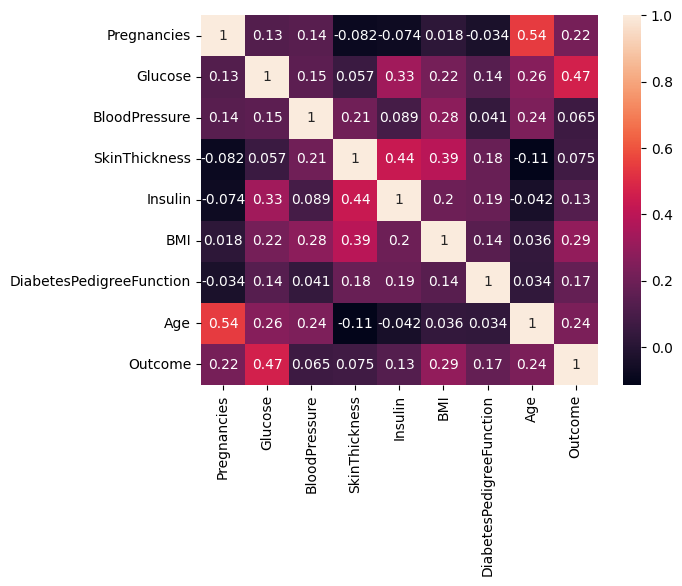

In [8]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

In [9]:
x=df.drop('Outcome',axis=1)
y=df['Outcome']

In [10]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [11]:
from keras.models import Sequential
from keras.layers import Dense

In [12]:
model=Sequential()
model.add(Dense(32,activation='relu',input_dim=8))
model.add(Dense(1,activation='sigmoid'))

C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
model.fit(x_train,y_train,epochs=100,batch_size=32,validation_data=(x_test,y_test))

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6238 - loss: 0.6414 - val_accuracy: 0.6494 - val_loss: 0.6261
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7003 - loss: 0.5803 - val_accuracy: 0.6558 - val_loss: 0.5844
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7296 - loss: 0.5445 - val_accuracy: 0.6883 - val_loss: 0.5562
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7557 - loss: 0.5195 - val_accuracy: 0.7078 - val_loss: 0.5402
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7622 - loss: 0.5023 - val_accuracy: 0.7078 - val_loss: 0.5293
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7720 - loss: 0.4893 - val_accuracy: 0.7338 - val_loss: 0.5208
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7801 - loss: 0.4790 - val_accuracy: 0.7338 - val_loss: 0.5136
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7752 - loss: 0.4711 - val_accuracy: 0.7338 - 

HOW TO SELECT OPTIMIZER
no.of nodes in layer
how to select no.of layer
all in one


In [15]:
import keras_tuner as kt

optimizer


In [16]:
def build_model(hp):
    
    model=Sequential()
    model.add(Dense(32,activation='relu',input_dim=8))
    model.add(Dense(1,activation='sigmoid'))

    model.compile(optimizer=hp.Choice('optimize',values=['adam','sgd','rmsprop','adagrad']),loss='binary_crossentropy',metrics=['accuracy'])
    return model

In [17]:
tuner= kt.RandomSearch(build_model,objective='val_accuracy',max_trials=5,directory='my_dir',project_name='diabetes_tuning')

C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
tuner.search(x_train,y_train,epochs=5,validation_data=(x_test,y_test))

Trial 4 Complete [00h 00m 03s]
val_accuracy: 0.701298713684082

Best val_accuracy So Far: 0.7467532753944397
Total elapsed time: 00h 00m 13s


In [19]:
tuner.get_best_hyperparameters()[0].values

{'optimize': 'rmsprop'}

In [20]:
model=tuner.get_best_models(num_models=1)[0]

C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 6 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 321 (1.25 KB)

 Trainable params: 321 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.fit(x_train,y_train,epochs=100,batch_size=32,initial_epoch=6,validation_data=(x_test,y_test))

Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7573 - loss: 0.5235 - val_accuracy: 0.7468 - val_loss: 0.5353
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7573 - loss: 0.5076 - val_accuracy: 0.7468 - val_loss: 0.5245
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7590 - loss: 0.4959 - val_accuracy: 0.7468 - val_loss: 0.5185
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7573 - loss: 0.4875 - val_accuracy: 0.7597 - val_loss: 0.5141
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7573 - loss: 0.4805 - val_accuracy: 0.7597 - val_loss: 0.5082
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7655 - loss: 0.4741 - val_accuracy: 0.7532 - val_loss: 0.5047
Epoch 13/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7638 - loss: 0.4685 - val_accuracy: 0.7532 - val_loss: 0.5026
Epoch 14/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7704 - loss: 0.4643 - val_accuracy: 0.75

No. of neurons in layer

In [74]:
def build_model(hp):
    
    model=Sequential()
    units=hp.Int('units',8,126)
    model.add(Dense(units=units,activation='relu',input_dim=8))
    model.add(Dense(1,activation='sigmoid'))

    model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
    return model

In [75]:
tuner=kt.RandomSearch(build_model,objective='val_accuracy',max_trials=5,directory='my_dir',project_name='diabetes_tuning_2')

In [76]:
tuner.search(x_train,y_train,epochs=5,validation_data=(x_test,y_test))

Trial 5 Complete [00h 00m 03s]
val_accuracy: 0.7792207598686218

Best val_accuracy So Far: 0.7792207598686218
Total elapsed time: 00h 00m 15s


In [77]:
tuner.get_best_hyperparameters()[0].values

{'units': 120}

In [78]:
model=tuner.get_best_models(num_models=1)[0]

In [79]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 120)            │         1,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,201 (4.69 KB)

 Trainable params: 1,201 (4.69 KB)

 Non-trainable params: 0 (0.00 B)

In [80]:
model.fit(x_train,y_train,epochs=100,batch_size=32,initial_epoch=6,validation_data=(x_test,y_test))

Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7752 - loss: 0.4606 - val_accuracy: 0.7662 - val_loss: 0.5015
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7818 - loss: 0.4506 - val_accuracy: 0.7662 - val_loss: 0.4997
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7818 - loss: 0.4455 - val_accuracy: 0.7662 - val_loss: 0.5028
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7866 - loss: 0.4417 - val_accuracy: 0.7597 - val_loss: 0.5039
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7866 - loss: 0.4385 - val_accuracy: 0.7532 - val_loss: 0.5080
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7915 - loss: 0.4360 - val_accuracy: 0.7532 - val_loss: 0.5074
Epoch 13/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7899 - loss: 0.4339 - val_accuracy: 0.7468 - val_loss: 0.5092
Epoch 14/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7850 - loss: 0.4322 - val_accuracy

No. of layers


In [107]:
def build_model(hp):
    
    model=Sequential()
    model.add(Dense(120,activation='relu',input_dim=8))
    for i in range(hp.Int('nums_layers',min_value=1,max_value=10)):
        model.add(Dense(120,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
    return model

    

In [108]:
tuner=kt.RandomSearch(build_model,objective='val_accuracy',max_trials=5,directory='my_dir',project_name='diabetes_tuning_3')


In [109]:
tuner.search(x_train,y_train,epochs=3,validation_data=(x_test,y_test))

Trial 5 Complete [00h 00m 06s]
val_accuracy: 0.7727272510528564

Best val_accuracy So Far: 0.7792207598686218
Total elapsed time: 00h 00m 27s


In [110]:
tuner.get_best_hyperparameters()[0].values

{'nums_layers': 7}

In [106]:
model=tuner.get_best_models(num_models=1)[0]

C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 8 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [101]:
model.fit(x_train,y_train,epochs=100,batch_size=32,initial_epoch=3,validation_data=(x_test,y_test))

Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7834 - loss: 0.4579 - val_accuracy: 0.7013 - val_loss: 0.5426
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8046 - loss: 0.4242 - val_accuracy: 0.7468 - val_loss: 0.6029
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7980 - loss: 0.4198 - val_accuracy: 0.6818 - val_loss: 0.5670
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8094 - loss: 0.4161 - val_accuracy: 0.7273 - val_loss: 0.5729
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8257 - loss: 0.3844 - val_accuracy: 0.7208 - val_loss: 0.8681
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8143 - loss: 0.3951 - val_accuracy: 0.7532 - val_loss: 0.5950
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8290 - loss: 0.3728 - val_accuracy: 0.7338 - val_loss: 0.6150
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8420 - loss: 0.3626 - val_accuracy: 0.7273

In [166]:
from keras.layers import Dropout
def build_model(hp):

    model=Sequential()
    counter=0
    for i in range(hp.Int('num_layers',1,10)):
        if counter==0:
            model.add(Dense(hp.Int('unit'+str(i),min_value=8,max_value=128),
                        activation=hp.Choice('activation'+str(i),values=['relu','tanh','leakyrelu']),
                        input_dim=8))
            model.add(Dropout(hp.Choice('dropout'+str(i),values=[0.2,0.3,0.4,0.5,0.6,0.7,0.8])))
        else:
            model.add(Dense(hp.Int('unit'+str(i),min_value=8,max_value=128),
                        activation=hp.Choice('activation'+str(i),values=['relu','tanh','leakyrelu'])))
            model.add(Dropout(hp.Choice('dropout'+str(i),values=[0.2,0.3,0.4,0.5,0.6,0.7,0.8])))

        counter+=1
    model.add(Dense(1,activation='sigmoid'))
    model.compile(optimizer=hp.Choice('optimizer',values=['adam','sgd','adagard','rmsprop']),loss='binary_crossentropy',metrics=['accuracy'])
    return model
        
       
            

In [167]:
tuner=kt.RandomSearch(build_model,objective=['val_accuracy','val_loss'],max_trials=5,directory='my_dir',project_name='diabetes_tuning_5')


C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [168]:
tuner.search(x_train,y_train,epochs=3,validation_data=(x_test,y_test))

Trial 5 Complete [00h 00m 02s]

Best multi_objective So Far: -0.2218664288520813
Total elapsed time: 00h 00m 13s


In [169]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 2,
 'unit0': 77,
 'activation0': 'tanh',
 'dropout0': 0.4,
 'optimizer': 'adam',
 'unit1': 128,
 'activation1': 'tanh',
 'dropout1': 0.8,
 'unit2': 44,
 'activation2': 'tanh',
 'dropout2': 0.6,
 'unit3': 95,
 'activation3': 'tanh',
 'dropout3': 0.4,
 'unit4': 19,
 'activation4': 'tanh',
 'dropout4': 0.6,
 'unit5': 54,
 'activation5': 'relu',
 'dropout5': 0.6,
 'unit6': 45,
 'activation6': 'tanh',
 'dropout6': 0.2,
 'unit7': 86,
 'activation7': 'relu',
 'dropout7': 0.2,
 'unit8': 41,
 'activation8': 'leakyrelu',
 'dropout8': 0.7,
 'unit9': 60,
 'activation9': 'relu',
 'dropout9': 0.6}

In [170]:
model=tuner.get_best_models(num_models=1)[0]

C:\Users\Lenovo\AppData\Roaming\Python\Python313\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [171]:
history =model.fit(x_train,y_train,epochs=150,batch_size=32,initial_epoch=6,validation_data=(x_test,y_test))

Epoch 7/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.7410 - loss: 0.5488 - val_accuracy: 0.7208 - val_loss: 0.4986
Epoch 8/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7003 - loss: 0.5748 - val_accuracy: 0.7403 - val_loss: 0.4914
Epoch 9/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7492 - loss: 0.5393 - val_accuracy: 0.7403 - val_loss: 0.5033
Epoch 10/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7492 - loss: 0.5208 - val_accuracy: 0.7338 - val_loss: 0.5109
Epoch 11/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7427 - loss: 0.5416 - val_accuracy: 0.7468 - val_loss: 0.5073
Epoch 12/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7492 - loss: 0.5206 - val_accuracy: 0.7662 - val_loss: 0.5030
Epoch 13/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7557 - loss: 0.5251 - val_accuracy: 0.7597 - val_loss: 0.5061
Epoch 14/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7541 - loss: 0.5228 - val_accuracy: 0.

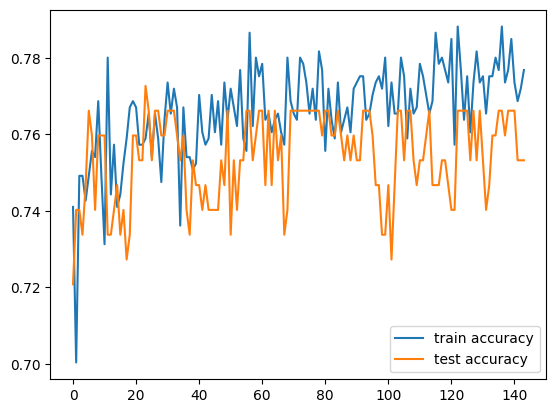

In [172]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label='train accuracy')
plt.plot(history.history['val_accuracy'],label='test accuracy')
plt.legend()

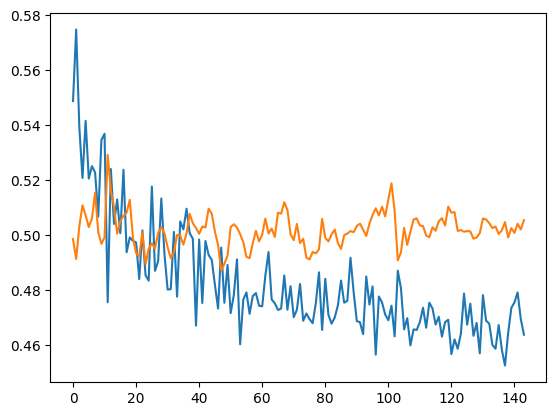

In [173]:
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='test loss')